In [232]:
#create Environment class
class MyEnvironment:

  def __init__(self):
    #maximum number of steps which the agent can take to gain rewards
    self.remaining_steps=20 #assume that the game must be completed within 20 steps

  def get_observation(self):
    #it can be any number of coordinates.Its considered as 3 here.
    #These values -0.0,0.0,0.0 represent some kind of logic that gives info about the environment.These values can be anything.
    return [1.0,2.0,1.0]  
  
  #when agent,performs an action,it should get a reward
  #i have set it as 1 for reward,-1 for punishment
  def get_actions(self):
    return [-1,1]

  #if steps are completed,return True because the agent should not move anymore
  def check_is_done(self)->bool:
    return self.remaining_steps==0

  def action(self,int):
    if self.check_is_done():
      raise Exception("Game over")      
    self.remaining_steps-=1  #if steps can still be taken-game not finished=>decrement the remaining number of steps
    return random.random()  #here-as this is a simple implementation-just returning a random number

class Env:
    def __init__(self):
        self.height = 5
        self.width = 5
        self.posX = 0
        self.posY = 0
        self.endX = self.width-1
        self.endY = self.height-1
        self.actions = [0, 1, 2, 3]
        self.stateCount = self.height*self.width
        self.actionCount = len(self.actions)

    def reset(self):
        self.posX = 0
        self.posY = 0
        self.done = False
        return 0, 0, False

    # take action
    def step(self, action):
        if action == 0: # left
            self.posX = self.posX-1 if self.posX > 0 else self.posX
        if action == 1: # right
            self.posX = self.posX+1 if self.posX < self.width - 1 else self.posX
        if action == 2: # up
            self.posY = self.posY-1 if self.posY > 0 else self.posY
        if action == 3: # down
            self.posY = self.posY+1 if self.posY < self.height - 1 else self.posY

        done = self.posX == self.endX and self.posY == self.endY
        # mapping (x,y) position to number between 0 and 5x5-1=24
        nextState = self.width * self.posY + self.posX
        reward = 1 if done else 0
        return nextState, reward, done

    # return a random action
    def randomAction(self):
        return np.random.choice(self.actions)

    # display environment
    def render(self):
        for i in range(self.height):
            for j in range(self.width):
                if self.posY == i and self.posX == j:
                    print("O", end='')
                elif self.endY == i and self.endX == j:
                    print("T", end='')
                else:
                    print(".", end='')
            print("")

In [233]:
#agent implements some policy
class myAgent:
  def __init__(self):
    self.total_rewards=0.0 #initially-agent-no rewards

  def step(self,ob:MyEnvironment):
    curr_obs=ob.get_observation()
    #print(curr_obs)
    curr_action=ob.get_actions()
    #print(curr_action)
    curr_reward=ob.action(random.choice(curr_action)) 
    #here,we are randomly picking -1 or 1
    #usually,when action() is invoked,implementation to check if the decision of the agent is crt-give positive reward else negative reward
    self.total_rewards+=curr_reward
   #print("Total rewards so far= %.3f "%self.total_rewards)



if __name__=='__main__':
  obj=MyEnvironment()
  agent=myAgent()
  step_number=0

  while not obj.check_is_done():
    step_number+=1
    agent.step(obj)
    
#print("Total reward is %.3f "%agent.total_rewards)
#different o/p everytime we run this code b'coz diff random numbers will be generated        


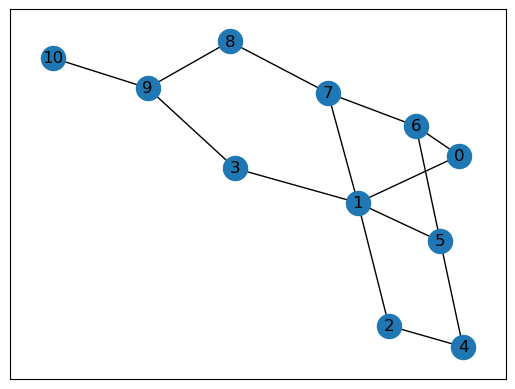

(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]
Most efficient path:
[0, 1, 3, 9, 10]


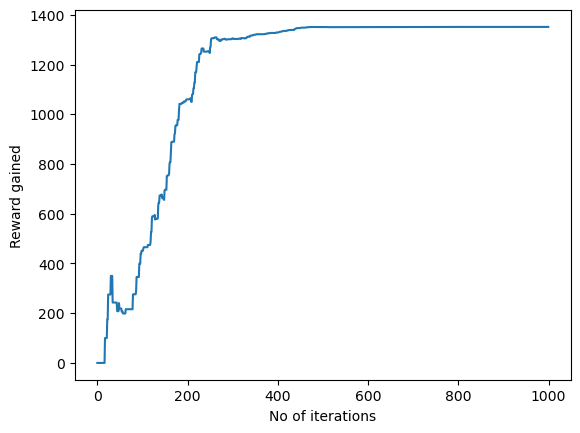

In [226]:
# Define the Q-table and learning rate
q_table = np.zeros((state_size, action_size))
alpha = 0.8
gamma = 0.95
 
# Train the Q-Learning algorithm
for episode in range(num_episodes):
    state = env.reset()
    done = False
    while not done:
        # Choose an action
        action = np.argmax(q_table[state, :] + np.random.randn(1, action_size) * (1. / (episode + 1)))
 
        # Take the action and observe the new state and reward
        next_state, reward, done, _ = env.step(action)
 
        # Update the Q-table
        q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]))
 
        state = next_state
 
# Test the trained Q-Learning algorithm
state = env.reset()
done = False
while not done:
    # Choose an action
    action = np.argmax(q_table[state, :])
 
    # Take the action
    state, reward, done, _ = env.step(action)
    env.render()
    
    
##########################################################
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2), 
         (1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
         (8, 9), (7, 8), (1, 7), (3, 9)]
  
goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()

MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1
  
for point in edges:
    print(point)
    if point[1] == goal:
        M[point] = 100
    else:
        M[point] = 0
  
    if point[0] == goal:
        M[point[::-1]] = 100
    else:
        M[point[::-1]]= 0
        # reverse of point
  
M[goal, goal]= 100
print(M)


Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
  
gamma = 0.75
# learning parameter
initial_state = 1
  
# Determines the available actions for a given state
def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action
  
available_action = available_actions(initial_state)
  
# Chooses one of the available actions at random
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action
  
  
action = sample_next_action(available_action)
  
def update(current_state, action, gamma):
  
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action] + gamma * max_value
  if (np.max(Q) > 0):
    return(np.sum(Q / np.max(Q)*100))
  else:
    return (0)
# Updates the Q-Matrix according to the path chosen
  
update(initial_state, action, gamma)

scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)
  
# print("Trained Q matrix:")
# print(Q / np.max(Q)*100)
# You can uncomment the above two lines to view the trained Q matrix
  
# Testing
current_state = 0
steps = [current_state]
  
while current_state != 10:
  
    next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    steps.append(next_step_index)
    current_state = next_step_index
  
print("Most efficient path:")
print(steps)
  
pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()


########################################################################

# Defining the locations of the police and the drug traces
police = [2, 4, 5]
drug_traces = [3, 8, 9]
  
G = nx.Graph()
G.add_edges_from(edges)
mapping = {0:'0 - Detective', 1:'1', 2:'2 - Police', 3:'3 - Drug traces',
           4:'4 - Police', 5:'5 - Police', 6:'6', 7:'7', 8:'Drug traces',
           9:'9 - Drug traces', 10:'10 - Drug racket location'}
  
H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)
#nx.draw_networkx_nodes(H, pos, node_size =[200, 200, 200, 200, 200, 200, 200, 200])
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)
pl.show()


Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_police = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
env_drugs = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
initial_state = 1
  
# Same as above
def available_actions(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
    return av_action
  
# Same as above
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action
  
# Exploring the environment
def collect_environmental_data(action):
    found = []
    if action in police:
        found.append('p')
    if action in drug_traces:
        found.append('d')
    return (found)
  
   
available_action = available_actions(initial_state)
action = sample_next_action(available_action)
  
def update(current_state, action, gamma):
  max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  Q[current_state, action] = M[current_state, action] + gamma * max_value
  environment = collect_environmental_data(action)
  if 'p' in environment:
    env_police[current_state, action] += 1
  if 'd' in environment:
    env_drugs[current_state, action] += 1
  if (np.max(Q) > 0):
    return(np.sum(Q / np.max(Q)*100))
  else:
    return (0)
# Same as above
update(initial_state, action, gamma)
  
def available_actions_with_env_help(state):
    current_state_row = M[state, ]
    av_action = np.where(current_state_row >= 0)[1]
  
    # if there are multiple routes, dis-favor anything negative
    env_pos_row = env_matrix_snap[state, av_action]
  
    if (np.sum(env_pos_row < 0)):
        # can we remove the negative directions from av_act?
        temp_av_action = av_action[np.array(env_pos_row)[0]>= 0]
        if len(temp_av_action) > 0:
            av_action = temp_av_action
    return av_action
# Determines the available actions according to the environment

scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
  
# print environmental matrices
print('Police Found')
print(env_police)
print('')
print('Drug traces Found')
print(env_drugs)

scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions_with_env_help(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)
    scores.append(score)
  
pl.plot(scores)
pl.xlabel('Number of iterations')
pl.ylabel('Reward gained')
pl.show()

In [ ]:
stemmer = PorterStemmer()
[stemmer.stem(word) for word in words]

In [ ]:
lemmatizer = WordNetLemmatizer()
[lemmatizer.lemmatize(word) for word in words]
tagged_words = nltk.pos_tag(words)
tagged_words

In [ ]:
txt = words

# Initialize a CountVectorizer object: count_vectorizer
#count_vec = CountVectorizer(stop_words="english", analyzer='word', 
 #                           ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

count_vec = CountVectorizer()
# Transforms the data into a bag of words
count_train = count_vec.fit(txt)
bag_of_words = count_vec.transform(txt)

bag_of_words.toarray()

bag_of_words[0].toarray()

#count_train.get_feature_names()

#############################################################


#from sklearn.feature_extraction.text import TfidfVectorizer
#txt = ["I Love chicken chicken",
       #"I hate chicken"]

#tvec = TfidfVectorizer()
#tvec_weights = tvec.fit_transform(txt)
#tvec.get_params()
#tvec_weights.toarray()
#tvec.get_feature_names()
#log [ (1 + n) / (1 + df(d, t)) ] + 1.
#1/2*(math.log(3/2) + 1)
#1/2*math.log(2/1)
#0.57/0.5
#1.14 = log10(2/x)


#corpus = [
    #'This is the first document.',
    #'This document is the second document.']
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(corpus)
#print(vectorizer.get_feature_names())
#print(X.shape)

#X.toarray()

In [ ]:
sms = pd.read_table(words, header=None, names=['label', 'message'])
sms.shape
sms.groupby('label').describe()

sms.head()

sms['length'] = sms['message'].apply(len)

sms.head()
sms.shape
sms.groupby('label').describe()
sms.describe()

sms['label_num'] = sms['label'].map({'ham' :0, 'spam': 1})

sms.iloc[0]['message']





In [ ]:
temp = 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
removepunc = "".join([c for c in temp if c not in string.punctuation])
lower = "".join([c for c in temp if c not in string.punctuation]).lower()
tokenize = nltk.word_tokenize("".join([c for c in temp if c not in string.punctuation]).lower())

remove_stop = [word for word in tokenize if word not in stopwords.words('english')]
def preprocessText(msg):
    removepunc = [c for c in msg if c not in string.punctuation]
    removepunc = "".join(removepunc)
    lower = removepunc.lower()
    tokenize = nltk.word_tokenize(lower)
    remove_stop = [word for word in tokenize if word not in stopwords.words('english')]
    remove_digit = [word for word in remove_stop if not word.isdigit()]
    joinagain = " ".join(remove_digit)
    return joinagain

#sms['pre_process'] = sms['message'].apply(preprocessText)
#sms.iloc[9]['message']
#sms.iloc[2]['pre_process']


cv = CountVectorizer(analyzer='word')
#feature_text = cv.fit_transform(sms['pre_process'])
cv.get_feature_names()
#feature_text.toarray()
#feature_text.shape




X_train, X_test, y_train, y_test = train_test_split(feature_text.toarray(), sms['label_num'], test_size = 0.3, random_state = 123)
X_train.shape
X_test.shape
y_train.shape
y_test.shape



lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

confusion_matrix(y_test, y_pred)

testdata = 'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'
#testdata = 'Hi How are you'
testdata = 'HDFC personal loan rate is 11.25%,  U R entitled to Update to the latest colour mobiles'

t = preprocessText(testdata)
t
cv.transform([t])
lr.predict(cv.transform([t]))

In [ ]:


Sentence=[("a","DT"),("african","JJ"),("cheetah","NN"),("was","VBP"),
("injured","VBP"),("by","IN"),("the","DT"),("arrow","NN")]
Grammer = "NP:{<DT>?*}"
parser_chunking = nltk.RegexpParser(Grammer)
parser_chunking.parse(Sentence)
Output_chunk = parser_chunking.parse(Sentence)
output.draw()


sentences = ['We are using the Bag of Word model', 'Bag of Word model is used for extracting the features.']
vectorizer = CountVectorizer()
features_text = vectorizer.fit_transform(sentences).todense()
print(vectorizer.vocabulary_)

In [ ]:
speed = [99,86,87,88,111,86,103,87,94,78,77,85,86]

M = np.mean(speed)
m = np.median(speed)
mo = stats.mode(speed)
std = np.std(speed)
va = np.var(speed)
pc25 = np.percentile(speed, 25)
pc75 = np.percentile(speed, 75)
print(M)
print(m)
print(mo)
print(std)
print(va)
print(pc25)
print(pc75)

In [ ]:

x = np.random.uniform(0.0, 5.0, 100000)
x2 = np.random.normal(5.0, 1.0, 100000)

plt.hist(x2, 100)
plt.show()
print(x)

In [ ]:
x = [89,43,36,36,95,10,66,34,38,20,26,29,48,64,6,5,36,66,72,40]
y = [21,46,3,35,67,95,53,72,58,10,26,34,90,33,38,20,56,2,47,15]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
mymodel2 = np.poly1d(np.polyfit(x, y, 3))
myline = np.linspace(min(y), max(y), 100)

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
plt.scatter(x, y)
plt.plot(myline, mymodel2(myline))
plt.show()
print(r2_score(y, mymodel2(x)))
if (r2_score(y,mymodel2(x)) > 0.9):
    print("this is a good fit")
elif (r2_score(y,mymodel2(x)) < 0.3):
    print("this is a bad fit")
speed = mymodel2(17)
print(speed)

In [ ]:
speed = myfunc(10)
print(speed)
print(r)

In [ ]:
x = np.random.normal(5.0, 1.0, 1000)
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

In [ ]:
import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)
#print(regr.coef_)

scaledX = scale.fit_transform(X)
#print(scaledX)

regr.fit(scaledX, y)

scaled = scale.transform([[2300, 1.3]])

predictedCO2 = regr.predict([scaled[0]])
print(predictedCO2)

In [ ]:
import numpy
import matplotlib.pyplot as plt
numpy.random.seed(2)

x = numpy.random.normal(3, 1, 100)
y = numpy.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = numpy.poly1d(numpy.polyfit(train_x, train_y, 4))

myline = numpy.linspace(0, 6, 100)

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

r2t = r2_score(test_y, mymodel(test_x))

print(r2t)
print(mymodel(5))

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

In [ ]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df = pandas.read_csv("data2.csv")

d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)

#print(dtree.predict([[40, 10, 6, 1]]))

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = numpy.random.binomial(1,.9,size = 1000)
predicted = numpy.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(actual, predicted)
Precision = metrics.precision_score(actual, predicted)
Sensitivity_recall = metrics.recall_score(actual, predicted)
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
F1_score = metrics.f1_score(actual, predicted)
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()


data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

NameError: name 'plt' is not defined

In [ ]:
from sklearn.cluster import AgglomerativeClustering
data = list(zip(x, y))

hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
labels = hierarchical_cluster.fit_predict(data)

plt.scatter(x, y, c=labels)
plt.show()

In [ ]:
import numpy
from sklearn import linear_model

def logit2prob(logr,x):
  log_odds = logr.coef_ * x + logr.intercept_
  odds = numpy.exp(log_odds)
  probability = odds / (1 + odds)
  return(probability)

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

#predict if tumor is cancerous where the size is 3.46mm:
predicted = logr.predict(numpy.array([3.46]).reshape(-1,1))
print("predicted = ",predicted)

log_odds = logr.coef_
odds = numpy.exp(log_odds)

print("odds=",odds)

print(logit2prob(logr, X))

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()

X = iris['data']
y = iris['target']

logit = LogisticRegression(max_iter = 10000)

C = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2]

scores = []

for choice in C:
  logit.set_params(C=choice)
  logit.fit(X, y)
  scores.append(logit.score(X, y))

print(scores)

In [ ]:
cars = pd.read_csv('data.csv')
ohe_cars = pd.get_dummies(cars[['Car']])

X = pandas.concat([cars[['Volume', 'Weight']], ohe_cars], axis=1)
y = cars['CO2']

regr = linear_model.LinearRegression()
regr.fit(X,y)

##predict the CO2 emission of a Volvo where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]])

print(predictedCO2)

colors = pd.DataFrame({'color': ['blue', 'red', 'green']})
dummies = pd.get_dummies(colors, drop_first=True)
dummies['color'] = colors['color']
print(dummies)
#print(ohe_cars.to_string())

In [ ]:
from sklearn.cluster import KMeans

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

data = list(zip(x, y))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

plt.scatter(x, y, c=kmeans.labels_)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

k_folds = KFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X, y, cv = sk_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

loo = LeaveOneOut()

scores = cross_val_score(clf, X, y, cv = loo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeavePOut, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

lpo = LeavePOut(p=2)

scores = cross_val_score(clf, X, y, cv = lpo)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_val_score

X, y = datasets.load_iris(return_X_y=True)

clf = DecisionTreeClassifier(random_state=42)

ss = ShuffleSplit(train_size=0.6, test_size=0.3, n_splits = 5)

scores = cross_val_score(clf, X, y, cv = ss)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

In [ ]:
#K-nearest neighbor

import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data, classes)


new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()



In [ ]:
#housing price prediction from US housing data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

customers = pd.read_csv('data3.csv')
customers.head()
customers.describe()
customers.info()
sns.pairplot(customers)
    
scaler = StandardScaler()
X=customers.drop(['Price','Address'],axis=1)
y=customers['Price']
cols = X.columns
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
r2_score(y_test,pred)
sns.scatterplot(x=y_test, y=pred)
sns.histplot((y_test-pred),bins=50,kde=True)
cdf=pd.DataFrame(lr.coef_, cols, ['coefficients']).sort_values('coefficients',ascending=False)
cdf

In [ ]:
#stock sentiment from newspaper headlines

import pandas as pd
import pickle
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,accuracy_score
df = pd.read_csv('data/Data.csv')
df.head(3)
headlines = []
cleaned_df = df.copy()
cleaned_df.replace('[^a-zA-Z]', ' ',regex=True,inplace=True)
cleaned_df.replace('[ ]+', ' ',regex=True,inplace=True)
for row in range(len(df)):
    headlines.append(' '.join(str(x) for x in cleaned_df.iloc[row,2:]).lower())
cv = CountVectorizer(ngram_range=(2,2))
cv.fit(headlines)
headlines[0]
train_data = cleaned_df[df['Date']<'20150101']
test_data = cleaned_df[df['Date']>'20141231']
train_data_len = len(train_data)
train_headlines = cv.transform(headlines[:train_data_len])
test_headlines = cv.transform(headlines[train_data_len:])
rfc = RandomForestClassifier(n_estimators=200,criterion='entropy')
rfc.fit(train_headlines,train_data['Label'])
preds = rfc.predict(test_headlines)
print(accuracy_score(test_data['Label'],preds))
confusion_matrix(test_data['Label'],preds)
joblib.dump(rfc, 'stock_sentiment.pkl')

In [ ]:
#predicting google price

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Dense
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
print(regressor.summary())
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import random



def roll_dice():
    die_1 = random.randint(1, 6)
    die_2 = random.randint(1, 6)

    # Determining if the dice are the same number
    if die_1 == die_2:
        same_num = True
    else:
        same_num = False
    return same_num

num_simulations = 10000
max_num_rolls = 1000
bet = 1

# Tracking
win_probability = []
end_balance = []
fig = plt.figure()
plt.title("Monte Carlo Dice Game [" + str(num_simulations) + "   
          simulations]")
plt.xlabel("Roll Number")
plt.ylabel("Balance [$]")
plt.xlim([0, max_num_rolls])
          
          
          
# For loop to run for the number of simulations desired
for i in range(num_simulations):
    balance = [1000]
    num_rolls = [0]
    num_wins = 0
    # Run until the player has rolled 1,000 times
    while num_rolls[-1] < max_num_rolls:
        same = roll_dice()
        # Result if the dice are the same number
        if same:
            balance.append(balance[-1] + 4 * bet)
            num_wins += 1
        # Result if the dice are different numbers
        else:
            balance.append(balance[-1] - bet)

        num_rolls.append(num_rolls[-1] + 1)
# Store tracking variables and add line to figure
    win_probability.append(num_wins/num_rolls[-1])
    end_balance.append(balance[-1])
    plt.plot(num_rolls, balance)
          
# Showing the plot after the simulations are finished
plt.show()

# Averaging win probability and end balance
overall_win_probability = sum(win_probability)/len(win_probability)
overall_end_balance = sum(end_balance)/len(end_balance)
# Displaying the averages
print("Average win probability after " + str(num_simulations) + "   
       runs: " + str(overall_win_probability))
print("Average ending balance after " + str(num_simulations) + " 
       runs: $" + str(overall_end_balance))
      
      
      
      
      
      



In [ ]:
from __future__ import division
import scipy.stats as stats
import seaborn as sns


def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

# setting the seed
rng.current = 1

def expon_pdf(x, lmabd=1):
    """PDF of exponential distribution."""
    return lmabd*np.exp(-lmabd*x)

def expon_cdf(x, lambd=1):
    """CDF of exponetial distribution."""
    return 1 - np.exp(-lambd*x)

def expon_icdf(p, lambd=1):
    """Inverse CDF of exponential distribution - i.e. quantile function."""
    return -np.log(1-p)/lambd

dist = stats.expon()
x = np.linspace(0,4,100)
y = np.linspace(0,1,100)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, expon_cdf(x))
    plt.axis([0, 4, 0, 1])
    for q in [0.5, 0.8]:
        plt.arrow(0, q, expon_icdf(q)-0.1, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
        plt.arrow(expon_icdf(q), q, 0, -q+0.1, head_width=0.1, head_length=0.05, fc='b', ec='b')
    plt.ylabel('1: Generate a (0,1) uniform PRNG')
    plt.xlabel('2: Find the inverse CDF')
    plt.title('Inverse transform method');

    plt.subplot(122)
    u = np.random.random(10000)
    v = expon_icdf(u)
    plt.hist(v, histtype='step', bins=100, linewidth=2)
    plt.plot(x, expon_pdf(x), linewidth=2)
    plt.axis([0,4,0,1])
    plt.title('Histogram of exponential PRNGs');
    
    
    
from scipy.interpolate import interp1d

def extrap1d(interpolator):
    """From StackOverflow http://bit.ly/1BjyRfk"""
    xs = interpolator.x
    ys = interpolator.y

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return np.array(map(pointwise, np.array(xs)))

    return ufunclike

from statsmodels.distributions.empirical_distribution import ECDF

# Make up some random data
x = np.concatenate([np.random.normal(0, 1, 10000),
                    np.random.normal(4, 1, 10000)])

ecdf = ECDF(x)
inv_cdf = extrap1d(interp1d(ecdf.y, ecdf.x,
                            bounds_error=False, assume_sorted=True))
r = np.random.uniform(0, 1, 1000)
ys = inv_cdf(r)

plt.hist(x, 25, histtype='step', color='red', normed=True, linewidth=1)
plt.hist(ys, 25, histtype='step', color='blue', normed=True, linewidth=1);

In [ ]:
# Suppose we want to sample from the (truncated) T distribution witb 10 degrees of freedom
# We use the uniform as a proposal distibution (highly inefficient)

x = np.linspace(-4, 4)

df = 10
dist = stats.cauchy()
upper = dist.pdf(0)

with plt.xkcd():
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(x, dist.pdf(x))
    plt.axhline(upper, color='grey')
    px = 1.0
    plt.arrow(px,0,0,dist.pdf(1.0)-0.01, linewidth=1,
              head_width=0.2, head_length=0.01, fc='g', ec='g')
    plt.arrow(px,upper,0,-(upper-dist.pdf(px)-0.01), linewidth=1,
              head_width=0.3, head_length=0.01, fc='r', ec='r')
    plt.text(px+.25, 0.2, 'Reject', fontsize=16)
    plt.text(px+.25, 0.01, 'Accept', fontsize=16)
    plt.axis([-4,4,0,0.4])
    plt.title('Rejection sampling concepts', fontsize=20)

    plt.subplot(122)
    n = 100000
    # generate from sampling distribution
    u = np.random.uniform(-4, 4, n)
    # accept-reject criterion for each point in sampling distribution
    r = np.random.uniform(0, upper, n)
    # accepted points will come from target (Cauchy) distribution
    v = u[r < dist.pdf(u)]

    plt.plot(x, dist.pdf(x), linewidth=2)

    # Plot scaled histogram
    factor = dist.cdf(4) - dist.cdf(-4)
    hist, bin_edges = np.histogram(v, bins=100, normed=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
    plt.step(bin_centers, factor*hist, linewidth=2)

    plt.axis([-4,4,0,0.4])
    plt.title('Histogram of accepted samples', fontsize=20);

In [ ]:
n = 10000
df = 5
dist = stats.t(df=df)
y = stats.chi2(df=df).rvs(n)
r = stats.norm(0, df/y).rvs(n)

with plt.xkcd():
    plt.plot(x, dist.pdf(x), linewidth=2)

    # Plot scaled histogram
    factor = dist.cdf(4) - dist.cdf(-4)
    hist, bin_edges = np.histogram(v, bins=100, normed=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
    plt.step(bin_centers, factor*hist, linewidth=2)

    plt.axis([-4,4,0,0.4])
    plt.title('Histogram of accepted samples', fontsize=20);

In [ ]:
n = 1000
u1 = np.random.random(n)
u2 = np.random.random(n)
r_squared = -2*np.log(u1)
r = np.sqrt(r_squared)
theta = 2*np.pi*u2
x = r*np.cos(theta)
y = r*np.sin(theta)
sns.jointplot(x, y, kind='scatter');

In [ ]:
# Using numpy
import numpy.random as npr

rs = npr.beta(a=0.5, b=0.5, size=1000)
plt.hist(rs, bins=20, histtype='step', normed=True, linewidth=1);

%load_ext rpy2.ipython

%%R

n <- 5
xs <- c(0.1, 0.5, 0.9)
print(dbeta(xs, 0.5, 0.5))
print(pbeta(xs, 0.5, 0.5))
print(qbeta(xs, 0.5, 0.5))
print(rbeta(n, 0.5, 0.5))

# Using scipy
import scipy.stats as ss

n = 5
xs = [0.1, 0.5, 0.9]
rv = ss.beta(a=0.5, b=0.5)

print rv.pdf(xs) # equivalent of dbeta
print rv.cdf(xs) # equivalent of pbeta
print rv.ppf(xs) # equvialent of qbeta
print rv.rvs(n) # equivalent of rbeta

# And here is a plot of the PDF for the beta distribution
xs = np.linspace(0, 1, 100)
plt.plot(xs, ss.beta.pdf(xs, a=0.5, b=0.5));

In [ ]:
x = np.linspace(0, 1, 100)
plt.plot(x, np.exp(x));
pts = np.random.uniform(0,1,(100, 2))
pts[:, 1] *= np.e
plt.scatter(pts[:, 0], pts[:, 1])
plt.xlim([0,1])
plt.ylim([0, np.e]);

# Check analytic solution

from sympy import symbols, integrate, exp

x = symbols('x')
expr = integrate(exp(x), (x,0,1))
expr.evalf()

# Using numerical quadrature
# You may recall elementary versions such as the
# trapezoidal and Simpson's rules
# Note that nuerical quadrature needs $n^p$ grid points
# in $p$ dimensions to maintain the same accuracy
# This is known as the curse of dimensionality and explains
# why quadrature is not used for high-dimensional integration

from scipy import integrate
integrate.quad(exp, 0, 1)

# Monte Carlo approximation

for n in 10**np.array([1,2,3,4,5,6,7,8]):
    pts = np.random.uniform(0, 1, (n, 2))
    pts[:, 1] *= np.e
    count = np.sum(pts[:, 1] < np.exp(pts[:, 0]))
    volume = np.e * 1 # volume of region
    sol = (volume * count)/n
    print '%10d %.6f' % (n, sol)

In [ ]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)
x = np.linspace(0, 1, 100)
plt.plot(x, f(x));
from sympy import sin, cos, symbols, integrate

x = symbols('x')
integrate(x * cos(71*x) + sin(13*x), (x, 0,1)).evalf(6)

h_true = 1 - stats.cauchy().cdf(3)
h_true

n = 100

x = stats.cauchy().rvs(n)
h_mc = 1.0/n * np.sum(x > 3)
h_mc, np.abs(h_mc - h_true)/h_true
y = stats.uniform().rvs(n)
h_cv = 1.0/n * np.sum(3.0/(np.pi * (9 + y**2)))
h_cv, np.abs(h_cv - h_true)/h_true

In [ ]:
from kanren import run, var, fact
from kanren.assoccomm import eq_assoccomm as eq
from kanren.assoccomm import commutative, associative

# Define values that will undertake the addition and multiplication operations
addition = 'add'
multiplication = 'mul'

# Define facts and properties of each operation
fact(commutative, multiplication)
fact(commutative, addition)
fact(associative, multiplication)
fact(associative, addition)

# Declare the variables that are going to form the expression
var_x, var_y, var_z = var('var_x'), var('var_y'), var('var_z')

# Build the correct pattern that the program needs to learn
match_pattern = (addition, (multiplication, 4, var_x, var_y), var_y, (multiplication, 6, var_z))
match_pattern = (addition, (multiplication, 3, 4), (multiplication, (addition, 1, (multiplication, 2, 4)),2))

# Build 3 distinct expressions to test if the function has learnt
test_expression_one = (addition, (multiplication, (addition, 1 , (multiplication, 2, var_x )), var_y) ,(multiplication, 3, var_z )) 
test_expression_two = (addition, (multiplication, var_z, 3), (multiplication, var_y, (addition, (multiplication, 2, var_x), 1)))
test_expression_three = (addition  , (addition, (multiplication, (multiplication, 2, var_x), var_y), var_y), (multiplication, 3, var_z))



# Test the evaluations of the expression on the test expressions
run(0,(var_x,var_y,var_z),eq(test_expression_one,match_pattern))


run(0,(var_x,var_y,var_z),eq(test_expression_two,match_pattern))

print(run(0,(var_x,var_y,var_z),eq(test_expression_three,match_pattern)))


# Running Mathematical Evaluations using SymPy
import math
import sympy

print (math.sqrt(8))


# Although the Math Square Root function gives an output for the Square Root of 8. 
# We know this is not accurate since the square root of 8 is a recursive, non-ending real number
print (sympy.sqrt(3))


# Import the necessary libraries for running the Prime Number function
from kanren import membero, isvar, run
from kanren.core import goaleval, condeseq, success, fail, eq, var
from sympy.ntheory.generate import isprime, prime
import itertools as iter_one

# Defining a function to build the expression
def exp_prime (input_num):
  if isvar(input_num):
    return condeseq([(eq, input_num, x)] for x in map(prime, iter_one.count(1)))
  else:
      return success if isprime (input_num) else fail


# Variable to use
n_test = var() 
set(run(0, n_test,(membero, n_test,(12,14,15,19,21,20,22,29,23,30,41,44,62,52,65,85)),( exp_prime, n_test)))

run(7, n_test, exp_prime( n_test ) )

In [ ]:
# We will be performing Noun-Phrase chunking in this example which is a category of chunking. Here we predefine grammatical notions that the program will use to perform the chunking.
import nltk
# The next step is to define the sentence’s structure.
# DT -> Determinant, VBP ->Verb, JJ -> Adjective, IN -> Preposition and NN -> Noun
test_phrases = [("an","DT"), ("astonishing","JJ"), ("leopard","NN"), ("is","VBP"), ("running","VBP"), ("around", "IN"), ("the","DT"),("ground","NN")]


### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

### INSTALL GHOSTSCRIPT (Required to display NLTK trees) ###
!apt install ghostscript python3-tk


# Chunking allows us to define the grammar as a regular expression
def_grammar = "NP:{?*}"
parse_chunk_tests = nltk.RegexpParser(def_grammar)
parse_chunk_tests.parse(test_phrases)

# Let us take a webpage link and use urllib module to crawl through the contents of this page.
import urllib.request
test_resp =  urllib.request.urlopen('https://en.wikipedia.org/wiki/Tesla,_Inc.')
input_page = test_resp.read()
print(input_page)

from bs4 import BeautifulSoup
soup_type = BeautifulSoup(input_page,'html5lib')
input_text = soup_type.get_text(strip = True)
print(input_text)

# This is now a grouped and clean output generated by BeautifulSoup
# These are now clean data chunks. The next step is to convert these chunks of text into tokens that the NLP algorithm can use.
build_tokens = [token for token in input_text.split()]
print(build_tokens)

import nltk
nltk.download('stopwords')


# This output consists of tokenized words
# We now count the word frequency of the contents
# The FreqDist() function within NLTK works best for this purpose. 
# We will preprocess the data by removing words like (at, the, a, for) that will not give meaning to the result. 
from nltk.corpus import stopwords
in_request = stopwords.words('english')
clean_text = build_tokens[:]
for token in build_tokens:
    if token in stopwords.words('english'):
        clean_text.remove(token)        
freq_dist = nltk.FreqDist(clean_text)
for k,v in freq_dist.items():
    print(str(k) + ':' + str(v))
    

# Lastly, we plot this output into a graph that will visually tell us what topic is most talked about throughout this web page
freq_dist.plot(20, cumulative=False)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
 
#Calculating the accuracy and the time taken by the classifier
t0=time.time()
#Data Splicing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_logreg = LogisticRegression(random_state=0)
#Building the model using the training data set
clf_logreg.fit(X_train,y_train)
 
#Evaluating the model using testing data set
y_pred = clf_logreg.predict(X_test)
score = accuracy_score(y_test,y_pred)
 
#Printing the accuracy and the time taken by the classifier
print('Accuracy using Logistic Regression:',score)
print('Time taken using Logistic Regression:' , time.time()-t0)
 
Accuracy using Logistic Regression: 0.8330181332740015
Time taken using Logistic Regression: 0.1741015911102295

#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
 
#Calculating the accuracy and the time taken by the classifier
t0=time.time()
#Data Splicing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_rf = RandomForestClassifier(n_estimators=100, max_depth=4,random_state=0)
#Building the model using the training data set
clf_rf.fit(X_train,y_train)
 
#Evaluating the model using testing data set
y_pred = clf_rf.predict(X_test)
score = accuracy_score(y_test,y_pred)
 
#Printing the accuracy and the time taken by the classifier
print('Accuracy using Random Forest Classifier:',score)
print('Time taken using Random Forest Classifier:' , time.time()-t0)
 
Accuracy using Random Forest Classifier: 0.8358363926280269
Time taken using Random Forest Classifier: 3.7179694175720215

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
 
#Calculating the accuracy and the time taken by the classifier
t0=time.time()
#Data Splicing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_dt = DecisionTreeClassifier(random_state=0)
#Building the model using the training data set
clf_dt.fit(X_train,y_train)
 
#Evaluating the model using testing data set
y_pred = clf_dt.predict(X_test)
score = accuracy_score(y_test,y_pred)
 
#Printing the accuracy and the time taken by the classifier
print('Accuracy using Decision Tree Classifier:',score)
print('Time taken using Decision Tree Classifier:' , time.time()-t0)
 
Accuracy using Decision Tree Classifier: 0.831423591797382
Time taken using Decision Tree Classifier: 0.0849456787109375

#Support Vector Machine
from sklearn import svm
from sklearn.model_selection import train_test_split
 
#Calculating the accuracy and the time taken by the classifier
t0=time.time()
#Data Splicing
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
clf_svc = svm.SVC(kernel='linear')
 
#Building the model using the training data set
clf_svc.fit(X_train,y_train)
 
#Evaluating the model using testing data set
y_pred = clf_svc.predict(X_test)
score = accuracy_score(y_test,y_pred)
 
#Printing the accuracy and the time taken by the classifier
print('Accuracy using Support Vector Machine:',score)
print('Time taken using Support Vector Machine:' , time.time()-t0)
 
Accuracy using Support Vector Machine: 0.7886676308080246
Time taken using Support Vector Machine: 88.42247271537781

In [ ]:
# Importing the basic preprocessing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# The series module from Pandas will help in creating a time series
from pandas import Series,DataFrame
get_ipython().run_line_magic('matplotlib', 'inline')


# In[2]:


# About the Data Set (Location: https://www.kaggle.com/sumanthvrao/daily-climate-time-series-data) 
# To forecast the daily climate of a city in India
time_series = pd.read_csv('DailyDelhiClimateTrain.csv', parse_dates=['date'], index_col='date')
time_series.head()


# In[3]:


# Below are a few statistical methods on time series that will help in understanding the data patterns
# Plotting all the individual columns to observe the pattern of data in each column
time_series.plot(subplots=True)


# In[4]:


# Calculating the mean, maximum values, and minimum of all individual columns of the dataset
time_series.mean()


# In[5]:


time_series.max()


# In[6]:


time_series.min()


# In[7]:


# The describe() method gives information like count, mean, deviations and quartiles of all columns
time_series.describe()


# In[8]:


# Resampling the dataset using the Mean() resample method
timeseries_mm = time_series['wind_speed'].resample("A").mean()
timeseries_mm.plot(style='g--')
plt.show()


# In[9]:


# Calculating the rolling mean with a 14-bracket window between time intervals
time_series['wind_speed'].rolling(window=14, center=False).mean().plot(style='-g')
plt.show()


# In[10]:


#Code Snippet 2: Working with stationarity


# In[11]:


# Importing the basic preprocessing packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# The series module from Pandas will help in creating a time series
from pandas import Series,DataFrame
get_ipython().run_line_magic('matplotlib', 'inline')
# Statsmodel and Adfuller will help in testing the stationarity of the time series
import statsmodels
from statsmodels.tsa.stattools import adfuller

time_series_train = pd.read_csv('DailyDelhiClimateTrain.csv', parse_dates=True)
time_series_train["date"] = pd.to_datetime(time_series_train["date"])
time_series_train.date.freq ="D"
time_series_train.set_index("date", inplace=True)
time_series_train.columns


# In[12]:


# Decomposing the time series with Statsmodels Decompose Method
from statsmodels.tsa.seasonal import seasonal_decompose
sd_1 = seasonal_decompose(time_series_train["meantemp"])
sd_2 = seasonal_decompose(time_series_train["humidity"])
sd_3 = seasonal_decompose(time_series_train["wind_speed"])
sd_4 = seasonal_decompose(time_series_train["meanpressure"])
sd_1.plot()
sd_2.plot()
sd_3.plot()
sd_4.plot()


# In[13]:


# From the above graph’s observations, it looks like everything other than meanpressure is already stationary

# To re-confirm stationarity, we will run all columns through the ad-fuller test
adfuller(time_series_train["meantemp"])


# In[14]:


adfuller(time_series_train["humidity"])


# In[15]:


adfuller(time_series_train["wind_speed"])


# In[16]:


adfuller(time_series_train["meanpressure"])


# In[17]:


# Consolidate the ad-fuller tests to test from static data
temp_var = time_series_train.columns
print('significance level : 0.05')
for var in temp_var:
    ad_full = adfuller(time_series_train[var])
    print(f'For {var}')
    print(f'Test static {ad_full[1]}',end='\n \n')


# In[18]:


# With the ad-fuller test, we can now conclude that all data is stationary since static tests are below significance levels. This also rejects the hypothesis that meanpressure was non-static.

# Let us now move towards training and validating the prediction model
from statsmodels.tsa.vector_ar.var_model import VAR
train_model = VAR(time_series_train)
fit_model = train_model.fit(6)
# AIC is lower for lag_order 6. Hence, we can assume the lag_order of 6.
fix_train_test = time_series_train.dropna()
order_lag_a = fit_model.k_ar
X = fix_train_test[:-order_lag_a]
Y = fix_train_test[-order_lag_a:]

# Model Validation
validate_y = X.values[-order_lag_a:]
forcast_val = fit_model.forecast(validate_y,steps=order_lag_a)
train_forecast = DataFrame(forcast_val,index=time_series_train.index[-order_lag_a:],columns=Y.columns)
train_forecast


# In[19]:


# Check performance of the predictions’ model
from sklearn.metrics import mean_absolute_error
for i in time_series_train.columns:
    print(f'MAE of {i} is {mean_absolute_error(Y[[i]],train_forecast[[i]])}')


# In[20]:


test_forecast = pd.read_csv('DailyDelhiClimateTest.csv',parse_dates=['date'], index_col='date')
period_range = pd.date_range('2017-01-05',periods=6)
order_lag_b = fit_model.k_ar
X1,Y1 = test_forecast[1:-order_lag_b],test_forecast[-order_lag_b:]
input_val = Y1.values[-order_lag_b:]
data_forecast = fit_model.forecast(input_val,steps=order_lag_b)
df_forecast = DataFrame(data_forecast,columns=X1.columns,index=period_range)
df_forecast


# In[21]:


# Plotting the test data with auto correlation
from statsmodels.graphics.tsaplots import plot_acf
# The next 6 periods of mean temperature (graph 1) and wind_speed (graph 2)
plot_acf(df_forecast["meantemp"])
plot_acf(df_forecast["wind_speed"])


# In[22]:


# Code Snippet 3: Granger Causality Tests


# In[23]:


# Import Granger Causality module from the statsmodels package and use the Chi-Squared test metric
from statsmodels.tsa.stattools import grangercausalitytests
test_var = time_series.columns
lag_max = 12
test_type = 'ssr_chi2test'

causal_val = DataFrame(np.zeros((len(test_var),len(test_var))),columns=test_var,index=test_var)
for a in test_var:
    for b in test_var:
        c = grangercausalitytests ( time_series [ [b,a] ], maxlag = lag_max, verbose = False)
        pred_val = [round ( c [ i +1 ] [0] [test_type] [1], 5 ) for i in range (lag_max) ]
        min_value = np.min (pred_val)
        causal_val.loc[b,a] = min_value
causal_val


# In[ ]:

In [ ]:
# importing the required modules  
from chatterbot import ChatBot  
from chatterbot.trainers import ListTrainer  
from chatterbot.trainers import ChatterBotCorpusTrainer  
  
# creating a chatbot  
myBot = ChatBot(  
    name = 'Sakura',  
    read_only = True,  
    logic_adapters = [  
        'chatterbot.logic.MathematicalEvaluation',  
        'chatterbot.logic.BestMatch'  
        ]  
        )  
  
# training the chatbot  
small_convo = [  
    'Hi there!',  
    'Hi',  
    'How do you do?',  
    'How are you?',  
    'I\'m cool.',  
    'Always cool.',  
    'I\'m Okay',  
    'Glad to hear that.',  
    'I\'m fine',  
    'I feel awesome',  
    'Excellent, glad to hear that.',  
    'Not so good',  
    'Sorry to hear that.',  
    'What\'s your name?',  
    ' I\'m Sakura. Ask me a math question, please.'  
    ]  
  
math_convo_1 = [  
    'Pythagorean theorem',  
    'a squared plus b squared equals c squared.'  
    ]  
  
math_convo_2 = [  
    'Law of Cosines',  
    'c**2 = a**2 + b**2 - 2*a*b*cos(gamma)'  
    ]  
  
# using the ListTrainer class  
list_trainee = ListTrainer(myBot)  
for i in (small_convo, math_convo_1, math_convo_2):  
    list_trainee.train(i)  
  
# using the ChatterBotCorpusTrainer class  
corpus_trainee = ChatterBotCorpusTrainer(myBot)  
corpus_trainee.train('chatterbot.corpus.english')  

In [ ]:
input_vector = [1.72, 1.23]
weights_1 = [1.26, 0]
weights_2 = [2.17, 0.32]

# Computing the dot product of input_vector and weights_1
first_indexes_mult = input_vector[0] * weights_1[0]
second_indexes_mult = input_vector[1] * weights_1[1]
dot_product_1 = first_indexes_mult + second_indexes_mult

print(f"The dot product is: {dot_product_1}")
dot_product_1 = np.dot(input_vector, weights_1)
print(f"The dot product is: {dot_product_1}")
dot_product_2 = np.dot(input_vector, weights_2)
print(f"The dot product is: {dot_product_2}")

In [33]:
t = pd.concat([covword, pd.DataFrame(columns=["is"])])
t.loc['are'] = 0
t

,count,is
are,0,0


In [34]:
import pandas as pd
wordmemory = pd.DataFrame(columns = ["count"])
covword = pd.DataFrame(columns = ["count"])

In [35]:
# text in
txt = open("read.txt","r")
txt = txt.readlines()
for i in range(len(txt)):
    if "\n" in txt[i]:
        txt[i] = txt[i].replace("\n", "")



wordlist = []
letter = ""
word = ""
word2 = ""
sentence = ""
sentence2 = ""
paragraph = ""


for lines in txt:
    for i in range(len(lines)):
        letter = lines[i]
        word = word + letter
        word = word.lower()
        
        if letter == " " or letter == "," or letter == "." or i == len(lines)-1:
            
            if word2 != " " and word2 != "" and word != " " and word != "":
                sentence2 = word2 + word
                if word not in covword.index:
                    covword.loc[word] = 0
                
                if word2 not in covword.columns:
                    covword = pd.concat([covword, pd.DataFrame(columns=[word2])])
                    covword[word2] = 0
                    
                covword[word2][word] = covword[word2][word] +1
            
            sentence = sentence + word
            
            wordlist.append(word)
            
            word2 = word
            
            word = ""
        
        if letter == "." or letter == "," or i == len(lines)-1:
            if sentence != "":
                paragraph = paragraph + sentence
            sentence = ""
            
        if len(sentence) == 0:
            paragraph = ""


wordlist2 = list(dict.fromkeys(wordlist))

wordmem = pd.DataFrame(0, index = wordlist2, columns = ["count"])
for i in range(len(wordmem)):
    
    for j in range(len(wordlist)):
        
        if wordmem.index[i] == wordlist[j]:
            wordmem['count'][wordmem.index[i]] = wordmem['count'][wordmem.index[i]] + 1

wordmem = wordmem.drop([" "])

for i in range(len(wordmem)):
    
    exists = False
    
    for j in range(len(wordmemory)):
        
        if wordmem.index[i] == wordmemory.index[j]:
            
            exists = True
            wordmemory['count'][wordmemory.index[j]] = wordmemory['count'][wordmemory.index[j]] + wordmem['count'][wordmem.index[i]]
    
    if exists == False:
        wordmemory.loc[wordmem.index[i]] = wordmem['count'][wordmem.index[i]]

C:\Users\Markb\AppData\Local\Temp\ipykernel_2372\333368146.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covword[word2][word] = covword[word2][word] +1
C:\Users\Markb\AppData\Local\Temp\ipykernel_2372\333368146.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covword[word2][word] = covword[word2][word] +1
C:\Users\Markb\AppData\Local\Temp\ipykernel_2372\333368146.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covword[w

In [37]:
covword.iloc['count','is']

ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [36]:
display(covword)
display(wordmemory)
#covword[covword[covword.columns[1]]>0]

,count,physics,is,the,natural,science,of,involving,study,"matter,",...,particles,appear,exist;,beyond,active,area,research.,[38],general,probabilities
is,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
the,0.0,0.0,1.0,0.0,0.0,0.0,29.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
natural,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
science,0.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
of,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[38],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
general,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
"field,",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
probabilities,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


,count
physics,29
is,32
the,175
natural,14
science,9
...,...
[38],1
general,1
"field,",1
probabilities,1


In [16]:
covword[covword[covword.columns[len(covword.columns)-1]]>0]

,count,the,åbo,bloodbath,(swedish:,blodbad;,finnish:,turun,verilöyly),of,...,[37],particles,exist;,beyond,active,area,research.,[38],general,probabilities
and,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
from numpy import array
from numpy import random
from numpy import dot
from scipy.special import softmax
 
# encoder representations of four different words
word_1 = array([1, 0, 0])
word_2 = array([0, 1, 0])
word_3 = array([1, 1, 0])
word_4 = array([0, 0, 1])
 
# stacking the word embeddings into a single array
words = array([word_1, word_2, word_3, word_4])
 
# generating the weight matrices
random.seed(42)
W_Q = random.randint(3, size=(3, 3))
W_K = random.randint(3, size=(3, 3))
W_V = random.randint(3, size=(3, 3))
 
# generating the queries, keys and values
Q = words @ W_Q
K = words @ W_K
V = words @ W_V
 
# scoring the query vectors against all key vectors
scores = Q @ K.transpose()
 
# computing the weights by a softmax operation
weights = softmax(scores / K.shape[1] ** 0.5, axis=1)
 
# computing the attention by a weighted sum of the value vectors
attention = weights @ V
 
print(attention)

[[0.98522025 1.74174051 0.75652026]
 [0.90965265 1.40965265 0.5       ]
 [0.99851226 1.75849334 0.75998108]
 [0.99560386 1.90407309 0.90846923]]


In [42]:
words

array([[1, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [0, 0, 1]])

In [39]:
W_Q

array([[2, 0, 2],
       [2, 0, 0],
       [2, 1, 2]])

In [41]:
Q

array([[2, 0, 2],
       [2, 0, 0],
       [4, 0, 2],
       [2, 1, 2]])

In [ ]:
Python
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.metrics import Mean
from tensorflow import data, train, math, reduce_sum, cast, equal, argmax, float32, GradientTape, TensorSpec, function, int64
from keras.losses import sparse_categorical_crossentropy
from model import TransformerModel
from prepare_dataset import PrepareDataset
from time import time
 
 
# Define the model parameters
h = 8  # Number of self-attention heads
d_k = 64  # Dimensionality of the linearly projected queries and keys
d_v = 64  # Dimensionality of the linearly projected values
d_model = 512  # Dimensionality of model layers' outputs
d_ff = 2048  # Dimensionality of the inner fully connected layer
n = 6  # Number of layers in the encoder stack
 
# Define the training parameters
epochs = 2
batch_size = 64
beta_1 = 0.9
beta_2 = 0.98
epsilon = 1e-9
dropout_rate = 0.1
 
 
# Implementing a learning rate scheduler
class LRScheduler(LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000, **kwargs):
        super(LRScheduler, self).__init__(**kwargs)
 
        self.d_model = cast(d_model, float32)
        self.warmup_steps = warmup_steps
 
    def __call__(self, step_num):
 
        # Linearly increasing the learning rate for the first warmup_steps, and decreasing it thereafter
        arg1 = step_num ** -0.5
        arg2 = step_num * (self.warmup_steps ** -1.5)
 
        return (self.d_model ** -0.5) * math.minimum(arg1, arg2)
 
 
# Instantiate an Adam optimizer
optimizer = Adam(LRScheduler(d_model), beta_1, beta_2, epsilon)
 
# Prepare the training and test splits of the dataset
dataset = PrepareDataset()
trainX, trainY, train_orig, enc_seq_length, dec_seq_length, enc_vocab_size, dec_vocab_size = dataset('english-german-both.pkl')
 
# Prepare the dataset batches
train_dataset = data.Dataset.from_tensor_slices((trainX, trainY))
train_dataset = train_dataset.batch(batch_size)
 
# Create model
training_model = TransformerModel(enc_vocab_size, dec_vocab_size, enc_seq_length, dec_seq_length, h, d_k, d_v, d_model, d_ff, n, dropout_rate)
 
 
# Defining the loss function
def loss_fcn(target, prediction):
    # Create mask so that the zero padding values are not included in the computation of loss
    padding_mask = math.logical_not(equal(target, 0))
    padding_mask = cast(padding_mask, float32)
 
    # Compute a sparse categorical cross-entropy loss on the unmasked values
    loss = sparse_categorical_crossentropy(target, prediction, from_logits=True) * padding_mask
 
    # Compute the mean loss over the unmasked values
    return reduce_sum(loss) / reduce_sum(padding_mask)
 
 
# Defining the accuracy function
def accuracy_fcn(target, prediction):
    # Create mask so that the zero padding values are not included in the computation of accuracy
    padding_mask = math.logical_not(equal(target, 0))
 
    # Find equal prediction and target values, and apply the padding mask
    accuracy = equal(target, argmax(prediction, axis=2))
    accuracy = math.logical_and(padding_mask, accuracy)
 
    # Cast the True/False values to 32-bit-precision floating-point numbers
    padding_mask = cast(padding_mask, float32)
    accuracy = cast(accuracy, float32)
 
    # Compute the mean accuracy over the unmasked values
    return reduce_sum(accuracy) / reduce_sum(padding_mask)
 
 
# Include metrics monitoring
train_loss = Mean(name='train_loss')
train_accuracy = Mean(name='train_accuracy')
 
# Create a checkpoint object and manager to manage multiple checkpoints
ckpt = train.Checkpoint(model=training_model, optimizer=optimizer)
ckpt_manager = train.CheckpointManager(ckpt, "./checkpoints", max_to_keep=3)
 
# Speeding up the training process
@function
def train_step(encoder_input, decoder_input, decoder_output):
    with GradientTape() as tape:
 
        # Run the forward pass of the model to generate a prediction
        prediction = training_model(encoder_input, decoder_input, training=True)
 
        # Compute the training loss
        loss = loss_fcn(decoder_output, prediction)
 
        # Compute the training accuracy
        accuracy = accuracy_fcn(decoder_output, prediction)
 
    # Retrieve gradients of the trainable variables with respect to the training loss
    gradients = tape.gradient(loss, training_model.trainable_weights)
 
    # Update the values of the trainable variables by gradient descent
    optimizer.apply_gradients(zip(gradients, training_model.trainable_weights))
 
    train_loss(loss)
    train_accuracy(accuracy)
 
 
for epoch in range(epochs):
 
    train_loss.reset_states()
    train_accuracy.reset_states()
 
    print("\nStart of epoch %d" % (epoch + 1))
 
    start_time = time()
 
    # Iterate over the dataset batches
    for step, (train_batchX, train_batchY) in enumerate(train_dataset):
 
        # Define the encoder and decoder inputs, and the decoder output
        encoder_input = train_batchX[:, 1:]
        decoder_input = train_batchY[:, :-1]
        decoder_output = train_batchY[:, 1:]
 
        train_step(encoder_input, decoder_input, decoder_output)
 
        if step % 50 == 0:
            print(f'Epoch {epoch + 1} Step {step} Loss {train_loss.result():.4f} Accuracy {train_accuracy.result():.4f}')
            # print("Samples so far: %s" % ((step + 1) * batch_size))
 
    # Print epoch number and loss value at the end of every epoch
    print("Epoch %d: Training Loss %.4f, Training Accuracy %.4f" % (epoch + 1, train_loss.result(), train_accuracy.result()))
 
    # Save a checkpoint after every five epochs
    if (epoch + 1) % 5 == 0:
        save_path = ckpt_manager.save()
        print("Saved checkpoint at epoch %d" % (epoch + 1))
 
print("Total time taken: %.2fs" % (time() - start_time))